# News Popularity Prediction
### Contents
* Data visualization and EDA
* Hypothesis tests for a better understanding
* Data preprocessing and feature selection
* Modeling (Regression)
* Evaluation

# Loading dependencies and dataset

[Dataset on kaggle](https://www.kaggle.com/datasets/thehapyone/uci-online-news-popularity-data-set)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
data.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [3]:
data.shape

(39644, 61)

## Eliminating non-predictive features

In [4]:
data = data.drop(columns=['url', ' timedelta'])

In [5]:
data.head()

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length  ...   min_positive_polarity  \
0          0.0               4.680365  ...                0.100000   
1          0.0               4.913725  ...                0.033333   
2          0.0               4.393365  ...                0.100000   
3          0.0               4.404896  ...                0.136364   
4          0.0               4.682836  ...                0.033333   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     0.7               -0.350000                  -0.600   
1                     0.7               -0.118750                  -0.125   
2                     1.0               -0.466667                  -0.800   
3                     0.8               -0.369697                  -0.600   
4                     1.0               -0.220192                  -0.500   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000             0.500000                  -0.187500   
1               -0.100000             0.000000                   0.000000   
2               -0.133333             0.000000                   0.000000   
3               -0.166667             0.000000                   0.000000   
4               -0.050000             0.454545                   0.136364   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                 0.000000                       0.187500      593  
1                 0.500000                       0.000000      711  
2                 0.500000                       0.000000     1500  
3                 0.500000                       0.000000     1200  
4                 0.045455                       0.136364      505  

[5 rows x 59 columns]

In [6]:
data.shape

(39644, 59)

---
# Data understanding
In this part we use plotting tools to understand data

### Before plotting, let's describe data

In [7]:
data.describe()

n_tokens_title   n_tokens_content   n_unique_tokens  \
count     39644.000000       39644.000000      39644.000000   
mean         10.398749         546.514731          0.548216   
std           2.114037         471.107508          3.520708   
min           2.000000           0.000000          0.000000   
25%           9.000000         246.000000          0.470870   
50%          10.000000         409.000000          0.539226   
75%          12.000000         716.000000          0.608696   
max          23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

       ...   min_positive_polarity   max_positive_polarity  \
count  ...            39644.000000            39644.000000   
mean   ...                0.095446                0.756728   
std    ...                0.071315                0.247786   
min    ...                0.000000                0.000000   
25%    ...                0.050000                0.600000   
50%    ...                0.100000                0.800000   
75%    ...                0.100000                1.000000   
max    ...                1.000000                1.000000   

        avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                -0.259524               -0.521944               -0.107500   
std                  0.127726                0.290290                0.095373   
min                 -1.000000               -1.000000               -1.000000   
25%                 -0.328383               -0.700000               -0.125000   
50%                 -0.253333               -0.500000               -0.100000   
75%                 -0.186905               -0.300000               -0.050000   
max                  0.000000                0.000000                0.000000   

        title_subjectivity   title_sentiment_polarity  \
count         39644.000000               39644.000000   
mean              0.282353                   0.071425   
std               0.324247                   0.265450   
min               0.000000                  -1.000000   
25%               0.000000                   0.000000   
50%               0.150000                   0.000000   
75%               0.500000                   0.150000   
max               1.000000                   1.000000   

        abs_title_subjectivity   abs_title_sentiment_polarity         shares  
count             39644.000000                   39644.000000   39644.000000  
mean                  0.341843                       0.156064    3395.380184  
std                   0.188791                       0.226294   11626.950749  
min  

# Distribution graphs 
Plotting histogram for each feature

In [38]:
def dist_graphs(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i + 1})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

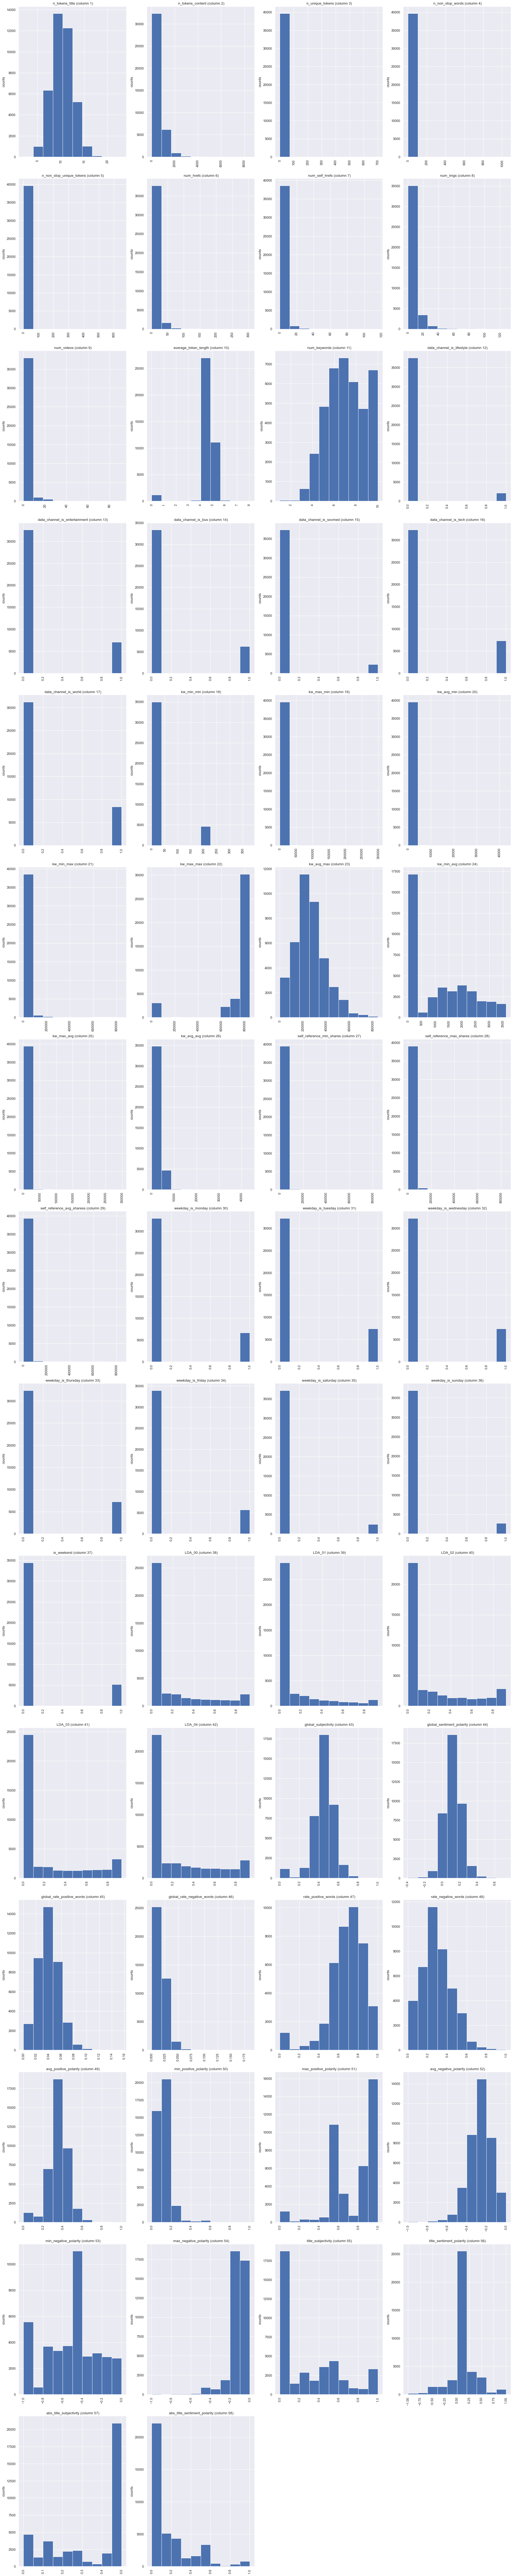

In [39]:
dist_graphs(data, 58, 4)

# Data understanding queries

In [8]:
len(data[data[' n_tokens_content'] == 0])

1181

In [9]:
len(data[(data[' n_tokens_content'] == 0) & (data[' n_unique_tokens'] == 0) & (data[' n_non_stop_words'] == 0) &
         (data[' n_non_stop_unique_tokens'] == 0) & (data[' num_hrefs'] == 0) & (data[' num_self_hrefs'] == 0)])

1181

In [10]:
len(data[data[' num_imgs'] == 0])

6987

In [11]:
len(data[data[' num_videos'] == 0])

25026

In [12]:
len(data[data[' average_token_length'] == 0])

1181

Eliminating articles with no content

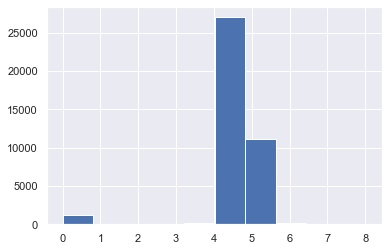

In [13]:
data[' average_token_length'].hist()
plt.show()

In [14]:
data = data[data[' n_tokens_content'] != 0]
data.shape

(38463, 59)

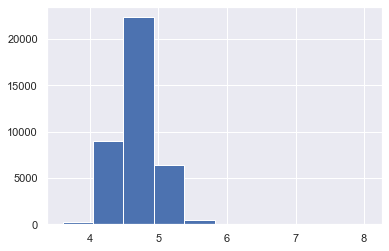

In [15]:
data[' average_token_length'].hist()
plt.show()

# Correlation matrix for features
In this part we analyze correlation between features 

In [16]:
def corr_maxrix(df, graphWidth=8):
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12608\2719044172.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(corrMat)


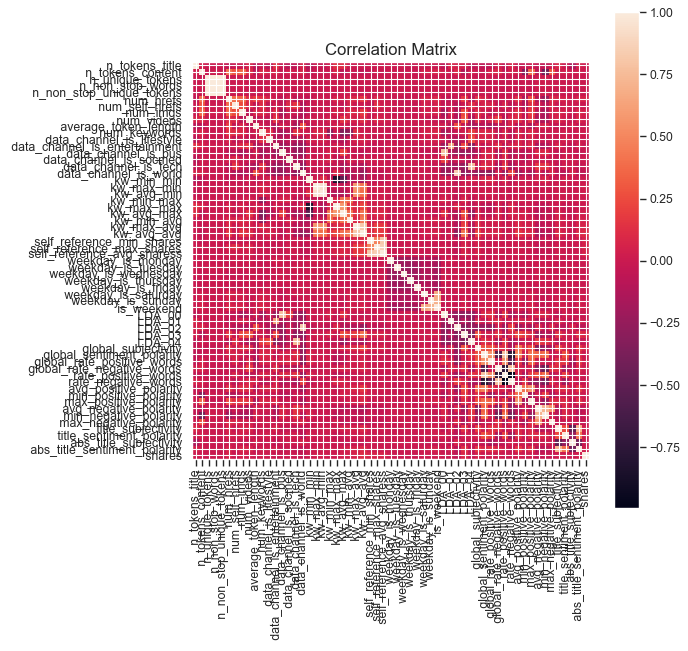

In [50]:
corr_maxrix(data)

# Correlation matrix using spearman method
This part we use spearman method

In [17]:
def spearman_corr_maxrix(df, graphWidth=8):
    corr = df.corr(method='spearman')
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12608\2916996053.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(corrMat)


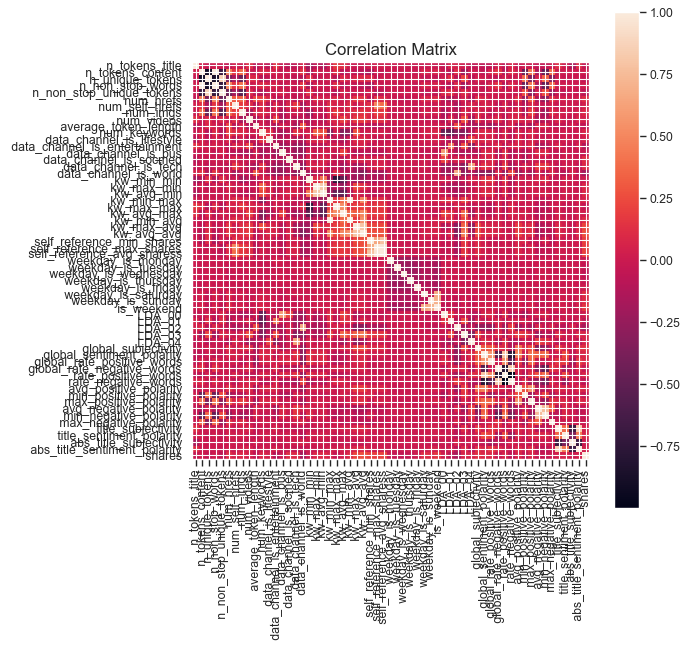

In [52]:
spearman_corr_maxrix(data)

# Box plot
Plotting box plot for a better understanding

In [18]:
def box_plot(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        columnDf.plot.box()
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i + 1})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

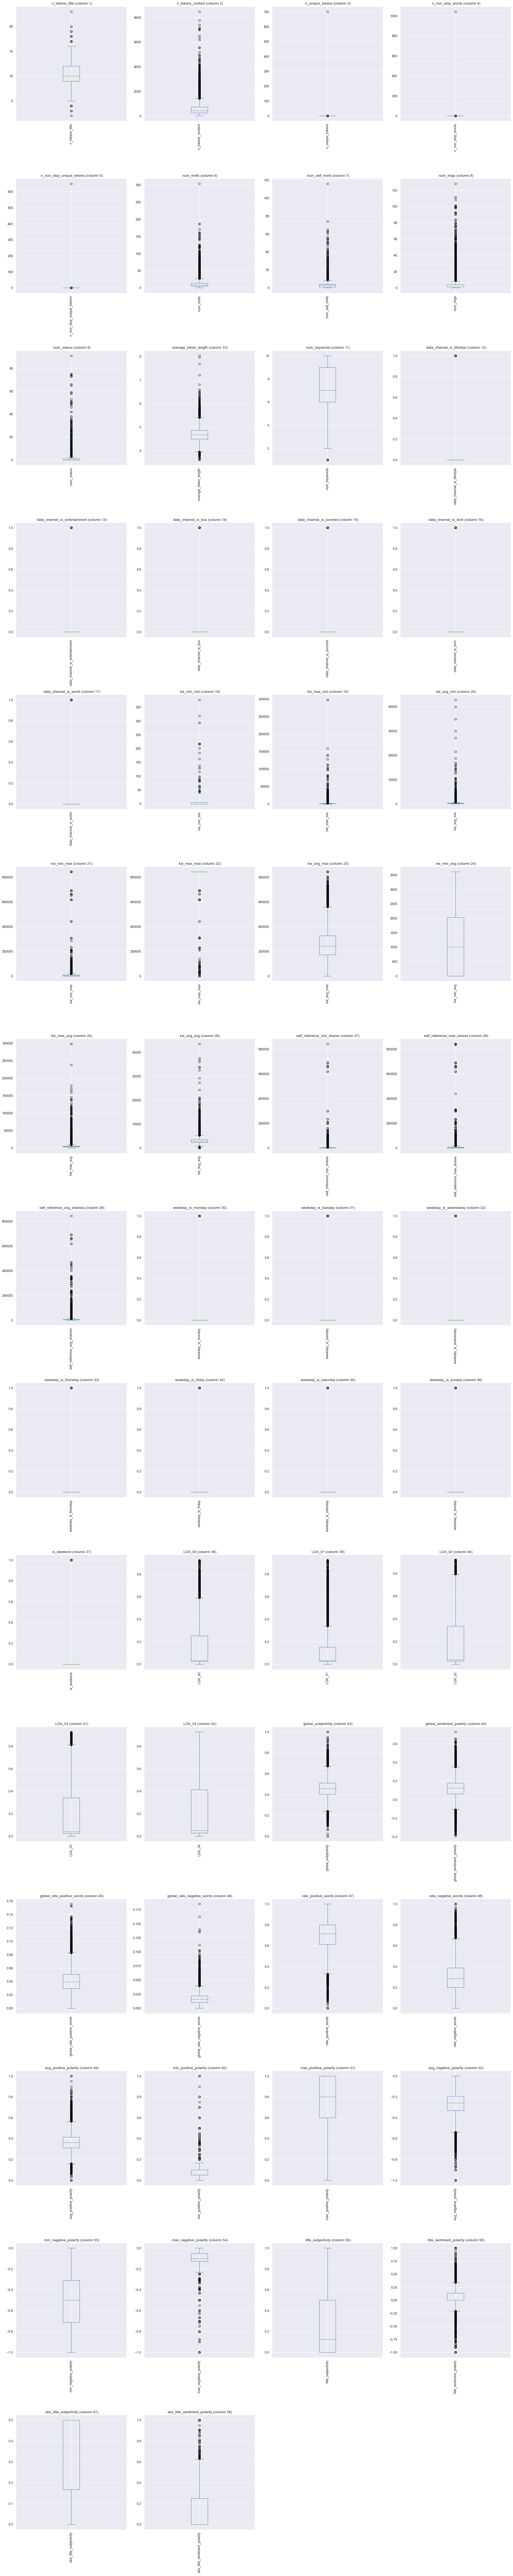

In [54]:
box_plot(data, 58, 4)

---
# Hypothesis testing
## Test number 1: Pearson correlation test
Is there a relationship between the number of words in the content and number of words in the title in the article popularity?

In [55]:
from scipy import stats

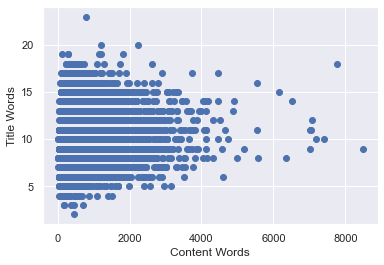

In [56]:
plt.scatter(data[' n_tokens_content'], data[' n_tokens_title'])
plt.xlabel('Content Words')
plt.ylabel('Title Words')
plt.show()

In [57]:
corr, p_values = stats.pearsonr(data[' n_tokens_content'], data[' n_tokens_title'])
print(corr, p_values)

0.028124037437698333 3.456323149024803e-08


## Test number 2: Spearman correlation test
Is there a relationship between the number of words in the content and the target?

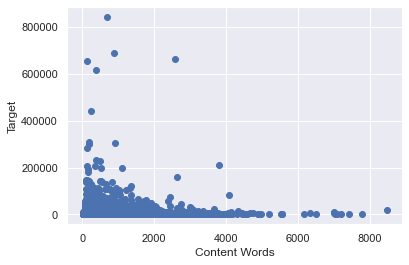

In [58]:
plt.scatter(data[' n_tokens_content'], data[' shares'])
plt.xlabel('Content Words')
plt.ylabel('Target')
plt.show()

In [59]:
corr, p_values = stats.spearmanr(data[' n_tokens_content'], data[' shares'])
print(corr, p_values)

0.018643398683658167 0.0002556428339681064


## Test number 3: Kendall-Tau Correlation Test
Is there a relationship between average length of words in the content to the target?

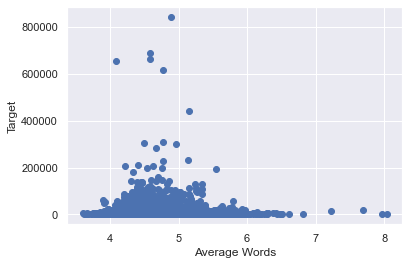

In [60]:
plt.scatter(data[' average_token_length'], data[' shares'])
plt.xlabel('Average Words')
plt.ylabel('Target')
plt.show()

In [61]:
corr, p_values = stats.kendalltau(data[' average_token_length'], data[' shares'])
print(corr, p_values)

-0.035443512617707514 4.534427444997239e-25


## Test number 4: T test
Is there a relationship between the number of the non-stop words and the number of the words in content?

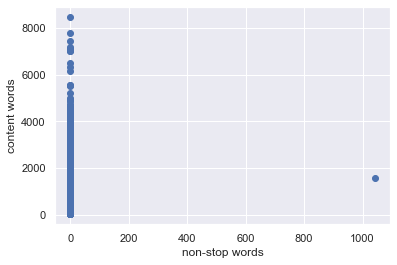

In [79]:
plt.scatter(data[' n_non_stop_words'], data[' n_tokens_content'])
plt.xlabel('non-stop words')
plt.ylabel('content words')
plt.show()

In [82]:
_, p_values = stats.ttest_ind(data[' n_non_stop_words'].sample(30), data[' n_tokens_content'].sample(30))
print(p_values)

8.244233829328284e-07


## Test number 5: Z test
Is there a relationship between title subjectivity and title sentiment subjectivity?

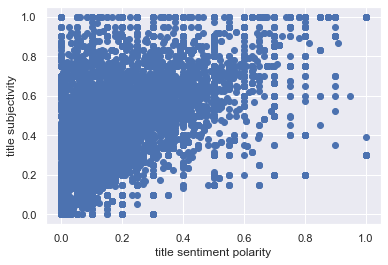

In [83]:
plt.scatter(data[' abs_title_sentiment_polarity'], data[' title_subjectivity'])
plt.xlabel('title sentiment polarity')
plt.ylabel('title subjectivity')
plt.show()

In [84]:
import statsmodels.api as sm

In [90]:
_, p_values = sm.stats.ztest(data[' abs_title_sentiment_polarity'].sample(30), data[' title_subjectivity'].sample(30))
print(p_values)

0.10655005514747565


---
# Data preprocessing
* Missing data values
* Categorical to numerical
* Outlier detection
* Feature scaling


## Detecting missing data

In [91]:
data.isna().sum()

 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares        0
 self_reference_max_shares  

## Outlier detection

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [19]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k * array.std()
    lower_limit = array.mean() - k * array.std()
    array[array < lower_limit] = lower_limit
    array[array > upper_limit] = upper_limit
    return array

In [20]:
data = data.apply(cap_outliers, axis=0)

In [21]:
data.shape

(38463, 59)

# Feature scaling
* Standard scaling
* Min-max normalization
* Robust scaling

## Standard scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()

In [24]:
X = data.iloc[:, :-1].values
X = ss.fit_transform(X)
X

array([[ 0.76895106, -0.81418584,  1.00378218, ..., -1.02095004,
        -1.81561414,  0.166777  ],
       [-0.65553617, -0.7261117 ,  0.49661285, ..., -0.27903731,
         0.83544835, -0.70714713],
       [-0.65553617, -0.83375787,  0.24140927, ..., -0.27903731,
         0.83544835, -0.70714713],
       ...,
       [-0.1807071 , -0.26861548, -0.26509654, ...,  0.26053559,
        -1.57460846, -0.07156595],
       [-2.0800234 ,  0.31854544, -0.06569661, ..., -0.27903731,
         0.83544835, -0.70714713],
       [-0.1807071 , -0.96586908,  1.3346391 , ...,  0.71017968,
        -0.93192664,  0.45808504]])

In [25]:
standard_data = data.copy()
standard_data.iloc[:, :-1] = X
standard_data.head()

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0         0.768951          -0.814186          1.003782          -0.005099   
1        -0.655536          -0.726112          0.496613          -0.005099   
2        -0.655536          -0.833758          0.241409          -0.005099   
3        -0.655536          -0.050877         -0.373399          -0.005099   
4         1.243780           1.272682         -1.132991          -0.005099   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   1.079462   -0.739271        -0.427531  -0.487729   
1                   0.871517   -0.847201        -0.772882  -0.487729   
2                  -0.264814   -0.847201        -0.772882  -0.487729   
3                  -0.249118   -0.199621        -1.118234  -0.487729   
4                  -1.355856    0.879678         4.063456   2.348144   

    num_videos   average_token_length  ...   min_positive_polarity  \
0    -0.387089              -0.021789  ...                0.071138   
1    -0.387089               0.822856  ...               -1.078702   
2    -0.387089              -1.060583  ...                0.071138   
3    -0.387089              -1.018845  ...                0.698323   
4    -0.387089              -0.012847  ...               -1.078702   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0               -0.378689               -0.719178               -0.221774   
1               -0.378689                1.267991                1.476479   
2                1.038005               -1.721713               -0.936828   
3                0.093542               -0.888437               -0.221774   
4                1.038005                0.396281                0.135753   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -1.201725             0.678170                  -1.020950   
1                0.095353            -0.867153                  -0.279037   
2               -0.337006            -0.867153                  -0.279037   
3               -0.769365            -0.867153                  -0.279037   
4                0.743892             0.537687                   0.260536   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                -1.815614                       0.166777    593.0  
1                 0.835448                      -0.707147    711.0  
2                 0.835448                      -0.707147   1500.0  
3                 0.835448                      -0.707147   1200.0  
4                -1.574608                      -0.071566    505.0  

[5 rows x 59 columns]

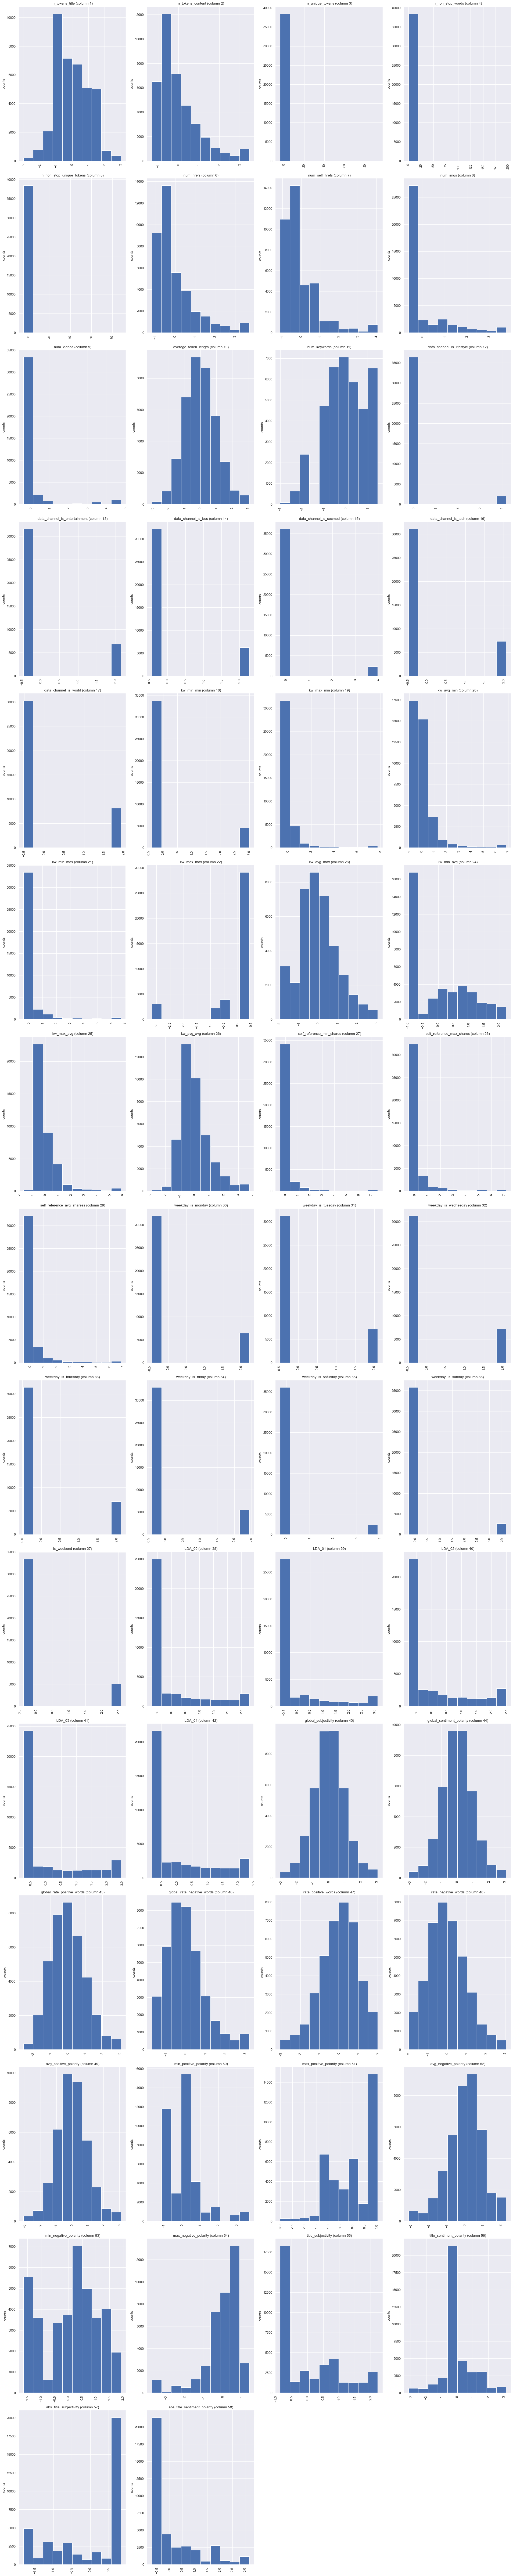

In [103]:
dist_graphs(standard_data, 58, 4)

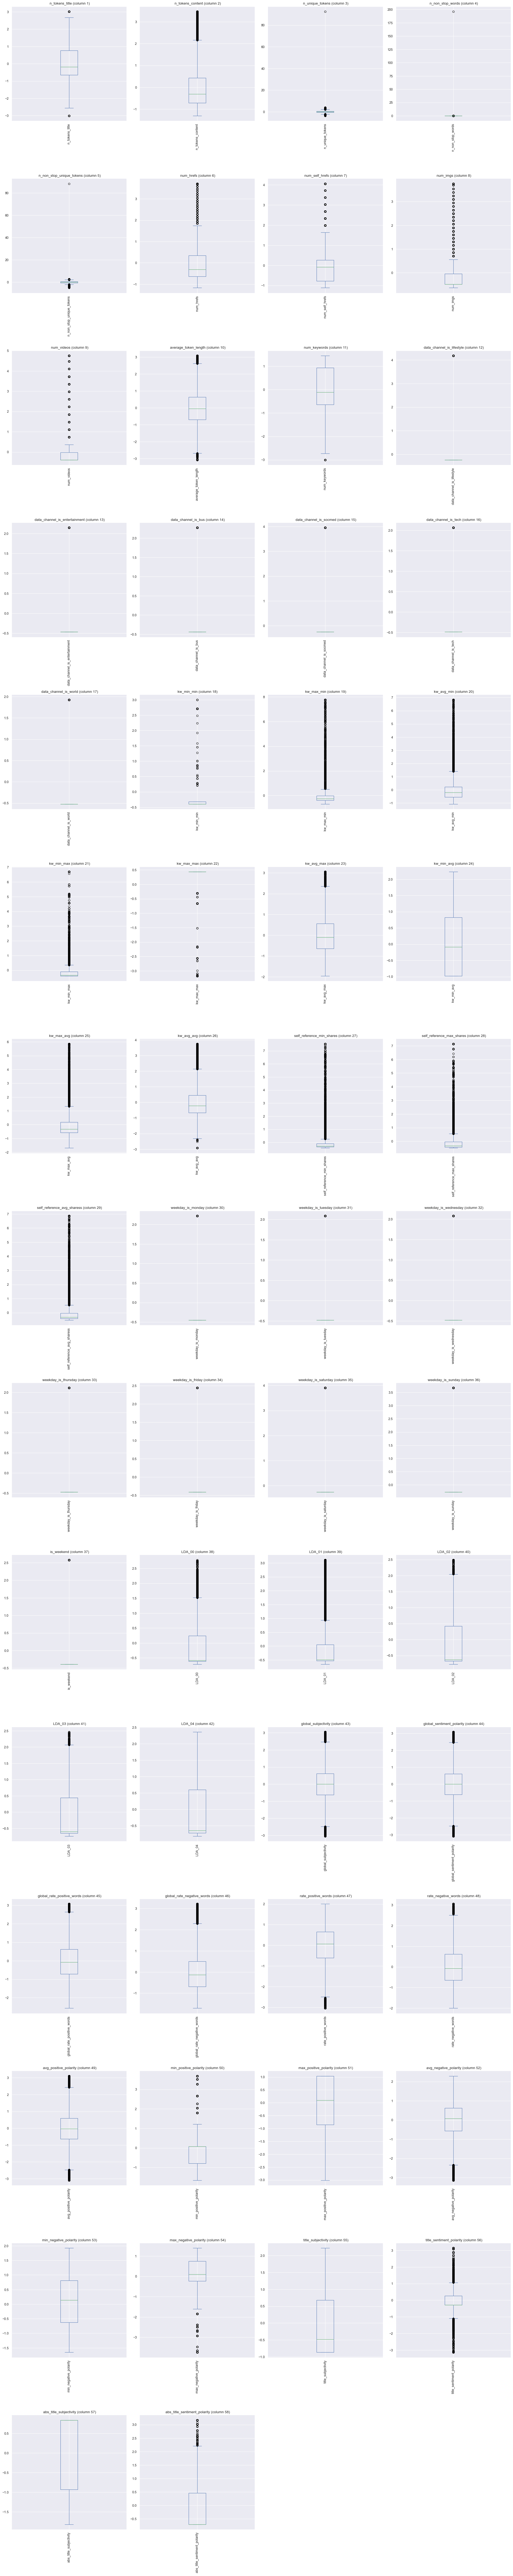

In [105]:
box_plot(standard_data, 58, 4)

## Min-max normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
min_max = MinMaxScaler()

In [28]:
X = data.iloc[:, :-1].values
X = min_max.fit_transform(X)
X

array([[0.62754128, 0.10306667, 0.04912021, ..., 0.33701643, 0.        ,
        0.2254047 ],
       [0.39100045, 0.12152637, 0.04385111, ..., 0.45523621, 1.        ,
        0.        ],
       [0.39100045, 0.09896451, 0.04119974, ..., 0.45523621, 1.        ,
        0.        ],
       ...,
       [0.46984739, 0.21741427, 0.03593753, ..., 0.54121423, 0.09090909,
        0.16393069],
       [0.15445961, 0.34047895, 0.03800914, ..., 0.45523621, 1.        ,
        0.        ],
       [0.46984739, 0.07127496, 0.05255756, ..., 0.61286258, 0.33333333,
        0.30053959]])

In [29]:
min_max_data = data.copy()
min_max_data.iloc[:, :-1] = X
min_max_data.head()

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0         0.627541           0.103067          0.049120       4.742085e-09   
1         0.391000           0.121526          0.043851       4.803586e-09   
2         0.391000           0.098965          0.041200       4.697511e-09   
3         0.391000           0.263051          0.034812       5.030217e-09   
4         0.706388           0.540459          0.026921       5.134349e-09   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.066133    0.088418         0.133297   0.033957   
1                   0.063906    0.066314         0.066649   0.033957   
2                   0.051741    0.066314         0.066649   0.033957   
3                   0.051909    0.198941         0.000000   0.033957   
4                   0.040060    0.419986         1.000000   0.679137   

    num_videos   average_token_length  ...   min_positive_polarity  \
0          0.0               0.495571  ...                0.323078   
1          0.0               0.632891  ...                0.107693   
2          0.0               0.326686  ...                0.323078   
3          0.0               0.333472  ...                0.440560   
4          0.0               0.497025  ...                0.107693   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                0.650172                0.445338                   0.400   
1                0.650172                0.811811                   0.875   
2                1.000000                0.260451                   0.200   
3                0.766781                0.414124                   0.400   
4                1.000000                0.651051                   0.500   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0                0.494384             0.500000                   0.337016   
1                0.747192             0.000000                   0.455236   
2                0.662923             0.000000                   0.455236   
3                0.578653             0.000000                   0.455236   
4                0.873596             0.454545                   0.541214   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                 0.000000                       0.225405    593.0  
1                 1.000000                       0.000000    711.0  
2                 1.000000                       0.000000   1500.0  
3                 1.000000                       0.000000   1200.0  
4                 0.090909                       0.163931    505.0  

[5 rows x 59 columns]

## Robust scaling


In [30]:
from sklearn.preprocessing import RobustScaler

In [31]:
rs = RobustScaler()

In [32]:
X = data.iloc[:, :-1].values
X = rs.fit_transform(X)
X

array([[ 0.66666667, -0.43404255,  0.90213525, ..., -1.375     ,
        -1.5       ,  0.75      ],
       [-0.33333333, -0.35744681,  0.46193318, ...,  0.        ,
         0.        ,  0.        ],
       [-0.33333333, -0.45106383,  0.240427  , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.04042553, -0.19919915, ...,  1.        ,
        -1.36363636,  0.54545455],
       [-1.33333333,  0.55106383, -0.02612824, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.56595745,  1.18930541, ...,  1.83333333,
        -1.        ,  1.        ]])

In [33]:
robust_data = data.copy()
robust_data.iloc[:, :-1] = X
robust_data.head()

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0         0.666667          -0.434043          0.902135          -0.941791   
1        -0.333333          -0.357447          0.461933          -0.697761   
2        -0.333333          -0.451064          0.240427          -1.118657   
3        -0.333333           0.229787         -0.293201           0.201493   
4         1.000000           1.380851         -0.952496           0.614677   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.978297   -0.444444        -0.333333   0.000000   
1                   0.789820   -0.555556        -0.666667   0.000000   
2                  -0.240127   -0.555556        -0.666667   0.000000   
3                  -0.225901    0.111111        -1.000000   0.000000   
4                  -1.229025    1.222222         4.001362   6.333333   

    num_videos   average_token_length  ...   min_positive_polarity  \
0          0.0               0.017076  ...                0.000000   
1          0.0               0.655281  ...               -1.333333   
2          0.0              -0.767827  ...                0.000000   
3          0.0              -0.736290  ...                0.727273   
4          0.0               0.023833  ...               -1.333333   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                   -0.25               -0.667997               -0.248889   
1                   -0.25                1.006305                0.933333   
2                    0.50               -1.512690               -0.746667   
3                    0.00               -0.810607               -0.248889   
4                    0.50                0.271840                0.000000   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -1.333333             0.750000                     -1.375   
1                0.000000            -0.250000                      0.000   
2               -0.444444            -0.250000                      0.000   
3               -0.888889            -0.250000                      0.000   
4                0.666667             0.659091                      1.000   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                -1.500000                       0.750000    593.0  
1                 0.000000                       0.000000    711.0  
2                 0.000000                       0.000000   1500.0  
3                 0.000000                       0.000000   1200.0  
4                -1.363636                       0.545455    505.0  

[5 rows x 59 columns]

---
# Feature Elimination
In this part we are going to analyze importance of each feature then eliminate non-important features


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(standard_data.iloc[:, :-1].to_numpy(), data[' shares'].to_numpy().reshape(-1,))

RandomForestRegressor(n_jobs=-1)

In [26]:
feature_importances = pd.DataFrame({'col':standard_data.iloc[:, :-1].columns, 'importance':rf.feature_importances_})

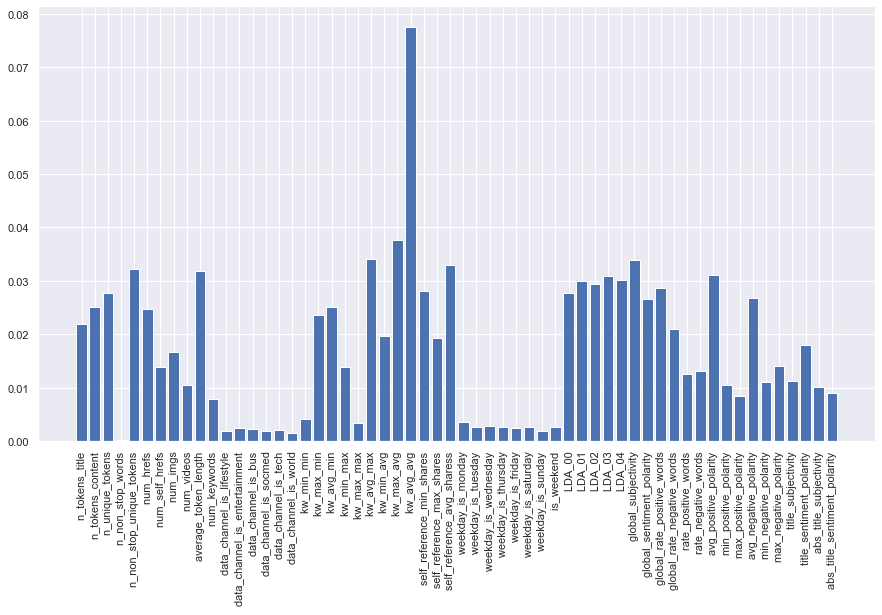

In [27]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])
plt.show()

## Eliminating non-important features

In [34]:
removed_features = [' n_non_stop_words', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', 
                    ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', 
                    ' kw_min_min', ' kw_max_max', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', 
                    ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', 
                    ' is_weekend']
len(removed_features)

17

In [35]:
standard_data = standard_data.drop(columns=removed_features)
min_max_data = min_max_data.drop(columns=removed_features)
robust_data = robust_data.drop(columns=removed_features)

In [36]:
standard_data.shape

(38463, 42)

---
# Modeling
First we are going to use linear model on each dataset

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Standard data

In [38]:
X = standard_data.iloc[:, :-1].values
y = standard_data[' shares'].values
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X, y, random_state=3243)

In [39]:
standard_model = LinearRegression()
standard_model.fit(X_train_standard, y_train_standard)

LinearRegression()

In [40]:
y_pred_standard = standard_model.predict(X_test_standard)

In [41]:
r2_score(y_test_standard, y_pred_standard)

0.07001253530968221

### Min max data

In [42]:
X = min_max_data.iloc[:, :-1].values
y = min_max_data[' shares'].values
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X, y, random_state=3243)

In [43]:
min_model = LinearRegression()
min_model.fit(X_train_min, y_train_min)

LinearRegression()

In [44]:
y_pred_min = min_model.predict(X_test_min)

In [45]:
r2_score(y_test_min, y_pred_min)

0.07001253530968188

### Robust data

In [46]:
X = robust_data.iloc[:, :-1].values
y = robust_data[' shares'].values
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, random_state=3243)

In [47]:
r_model = LinearRegression()
r_model.fit(X_train_r, y_train_r)

LinearRegression()

In [48]:
y_pred_r = r_model.predict(X_test_r)

In [49]:
r2_score(y_test_r, y_pred_r)

0.07001253530968221

## Now we are going to use polynomial regression
Just for Standard data. The effect will be the same in each dataset

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly = PolynomialFeatures(degree=2)

In [52]:
X = standard_data.iloc[:, :-1].values
y = standard_data[' shares'].values
X = poly.fit_transform(X)
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X, y, random_state=3243)

In [53]:
standard_model = LinearRegression()
standard_model.fit(X_train_standard, y_train_standard)

LinearRegression()

In [54]:
y_pred_standard = standard_model.predict(X_test_standard)

In [55]:
r2_score(y_test_standard, y_pred_standard)

-6.601577753347847e+16

## Now we can use Lasso regression

### Standard data

In [56]:
from sklearn import linear_model

In [113]:
X = standard_data.iloc[:, :-1].values
y = standard_data[' shares'].values
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X, y, random_state=3243)

In [58]:
standard_model = linear_model.Lasso(alpha=1, max_iter=3000)

In [59]:
standard_model.fit(X_train_standard, y_train_standard)

Lasso(alpha=1, max_iter=3000)

In [60]:
y_pred_standard = standard_model.predict(X_test_standard)

In [61]:
r2_score(y_test_standard, y_pred_standard)

0.06989036549793837

### Min-max data

In [62]:
min_model = linear_model.Lasso(alpha=1, max_iter=3000)
min_model.fit(X_train_min, y_train_min)

Lasso(alpha=1, max_iter=3000)

In [63]:
y_pred_min = min_model.predict(X_test_min)

In [64]:
r2_score(y_test_min, y_pred_min)

0.06963579344242032

### Robust data

In [65]:
r_model = linear_model.Lasso(alpha=1, max_iter=3000)
r_model.fit(X_train_r, y_train_r)

Lasso(alpha=1, max_iter=3000)

In [66]:
y_pred_r = r_model.predict(X_test_r)

In [67]:
r2_score(y_test_r, y_pred_r)

0.06989037403084142

## Now we can use Ridge regression
Again, just for standard data

In [68]:
standard_model = linear_model.Ridge(alpha=1, max_iter=5000)

In [69]:
standard_model.fit(X_train_standard, y_train_standard)

Ridge(alpha=1, max_iter=5000)

In [70]:
y_pred_standard = standard_model.predict(X_test_standard)

In [71]:
r2_score(y_test_standard, y_pred_standard)

0.07000669691585037

---
# Dimensionality reduction using PCA

In [80]:
from sklearn.decomposition import PCA

In [81]:
X = standard_data.iloc[:, :-1].values
y = standard_data[' shares'].values

In [82]:
pca = PCA(n_components=10)
components = pca.fit_transform(X)

In [83]:
components.shape

(38463, 10)

In [84]:
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(components, y, random_state=3243)

In [85]:
model = LinearRegression()
model.fit(X_train_standard, y_train_standard)

LinearRegression()

In [86]:
y_pred = model.predict(X_test_standard)

In [87]:
r2_score(y_test_standard, y_pred)

0.05088240416021561

---
# Feature selection using SFS and SBS

In [96]:
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from itertools import combinations

In [97]:
class SFS():
    def __init__(self, estimator, k_features):
        self.estimator = clone(estimator)
        self.k_features = k_features
         
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4040)
        max_indices = tuple(range(X_train.shape[1]))
        total_features_count = len(max_indices)
        self.subsets_ = []
        self.scores_ = []
        self.indices_ = []
        scores = []
        subsets = []
        
        # First part in algorithm
        for p in combinations(max_indices, r=1):
                score = self._calc_score(X_train, X_test, y_train, y_test, p)
                scores.append(score)
                subsets.append(p)
        best_score_index = np.argmax(scores)
        self.scores_.append(scores[best_score_index])
        self.indices_ = list(subsets[best_score_index])
        self.subsets_.append(self.indices_)
    
        # Continue algorithm until k_features is reached
        dim = 1
        while dim < self.k_features:
            scores = []
            subsets = []
            current_feature = dim
            idx = 0
            while idx < total_features_count:
                if idx not in self.indices_:
                    indices = list(self.indices_)
                    indices.append(idx)
                    score = self._calc_score(X_train, X_test, y_train, y_test, indices)
                    scores.append(score)
                    subsets.append(indices)
                idx += 1
             
            best_score_index = np.argmax(scores)
            self.scores_.append(scores[best_score_index])
            self.indices_ = list(subsets[best_score_index])
            self.subsets_.append(self.indices_)
            dim += 1
        self.k_score_ = self.scores_[-1]
     
    def transform(self, X):
        return X[:, self.indices_]
     
    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train.ravel())
        y_pred = self.estimator.predict(X_test[:, indices])
        score = mean_squared_error(y_test, y_pred)
        return score

In [98]:
class SBS():
    def __init__(self, estimator, k_features):
        self.estimator = clone(estimator)
        self.k_features = k_features
         
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4040)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, X_test, y_train, y_test, self.indices_)
        self.scores_ = [score]
        while dim > k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, X_test, y_train, y_test, p)
                scores.append(score)
                subsets.append(p)
            best_score_index = np.argmax(scores)
            self.scores_.append(scores[best_score_index])
            self.indices_ = subsets[best_score_index]
            self.subsets_.append(self.indices_)
            dim -= 1
     
    def transform(self, X):
        return X[:, self.indices_]
     
    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train.ravel())
        y_pred = self.estimator.predict(X_test[:, indices])
        score = mean_squared_error(y_test, y_pred)
        return score

### SFS 

In [114]:
reg = LinearRegression()
k_features = 20
sfs = SFS(reg, k_features)

In [115]:
sfs.fit(X, y)

In [116]:
selected_features = sfs.transform(X)
selected_features.shape

(38463, 20)

In [117]:
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(selected_features, y, random_state=3243)

In [118]:
model = LinearRegression()
model.fit(X_train_standard, y_train_standard)

LinearRegression()

In [119]:
y_pred = model.predict(X_test_standard)

In [120]:
r2_score(y_test_standard, y_pred)

0.008582133097813305

### SBS

In [121]:
reg = LinearRegression()
k_features = 20
sbs = SBS(reg, k_features)

In [122]:
sbs.fit(X, y)

In [123]:
selected_features = sbs.transform(X)
selected_features.shape

(38463, 20)

In [124]:
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(selected_features, y, random_state=3243)

In [125]:
model = LinearRegression()
model.fit(X_train_standard, y_train_standard)

LinearRegression()

In [126]:
y_pred = model.predict(X_test_standard)

In [127]:
r2_score(y_test_standard, y_pred)

0.02678470447208714